Input state |0⟩:
  Fidelity: 1.00000000
  Match: ✅
  Initial State: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))
  Final State:   Statevector([ 1.00000000e+00-1.8369702e-16j,
              0.00000000e+00+0.0000000e+00j,
              3.69569864e-17+1.5308085e-17j,
              0.00000000e+00+0.0000000e+00j,
             -8.63614149e-18+3.0616170e-17j,
              0.00000000e+00+0.0000000e+00j,
              6.34081642e-18+1.5308085e-17j,
              0.00000000e+00+0.0000000e+00j,
             -1.11022302e-16+6.1232340e-17j,
              0.00000000e+00+0.0000000e+00j,
             -6.34081642e-18+1.5308085e-17j,
              0.00000000e+00+0.0000000e+00j,
             -6.98684814e-17+3.0616170e-17j,
              0.00000000e+00+0.0000000e+00j,
             -3.69569864e-17+1.5308085e-17j,
              0.00000000e+00+0.0000000e+0

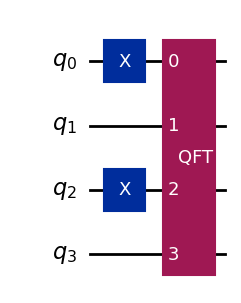

In [20]:
# QFT_iQFT_Verification.ipynb

# %%
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import *

# %%
def Add_QFT_IQFT(n, x):
    """Prepare |x⟩, apply QFT and inverse QFT, and compare final state with original."""
    # Create circuit and initialize |x⟩
    qc = QuantumCircuit(n)
    binary = format(x, f'0{n}b')
    for idx, bit in enumerate(reversed(binary)):
        if bit == '1':
            qc.x(idx)
    
    # Save initial state
    initial_sv = Statevector.from_instruction(qc)

    # Apply QFT then iQFT
    qft = QFT(n, do_swaps=False).decompose()
    iqft = QFT(n, do_swaps=False, inverse=True).decompose()

    qc.append(qft, range(n))
    qc.append(iqft, range(n))

    # Simulate final state
    simulator = Aer.get_backend("statevector_simulator")
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()
    final_sv = result.get_statevector()

    # Compare
    fidelity = np.abs(initial_sv.data @ final_sv.data.conj())**2
    is_equal = np.allclose(initial_sv.data, final_sv.data, atol=1e-6)

    print(f"Input state |{x}⟩:")
    print(f"  Fidelity: {fidelity:.8f}")
    print(f"  Match: {'✅' if is_equal else '❌'}")
    print(f"  Initial State: {initial_sv}")
    print(f"  Final State:   {final_sv}\n")

# %%
# Run for multiple inputs (0 to 5)
n = 4
for x in range(6):
    apply_qft_iqft_and_verify(n, x)



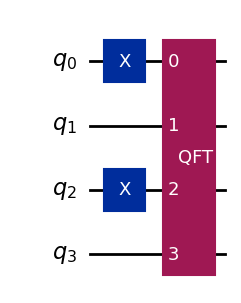

In [26]:
qc.draw("mpl")

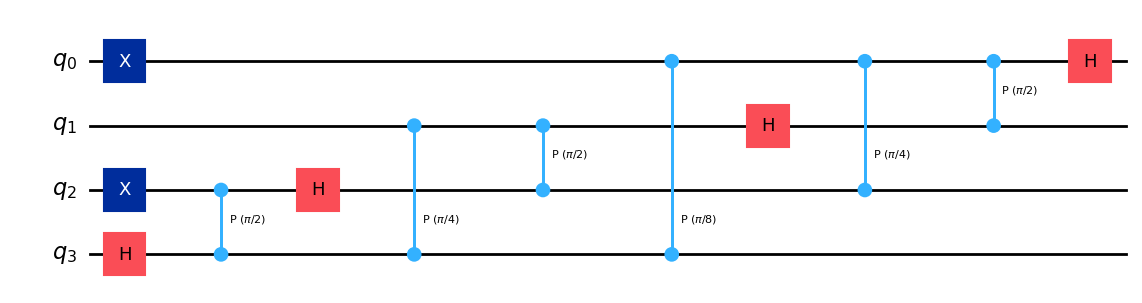

In [24]:
compiled.draw("mpl")